# Lab 5

#### Sayan Das - `B2430035`

### Importing Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [115]:
df = pd.read_csv('./data/data.csv')
df.head()

,Timestamp,SSC Marks,HSC Marks,BSc Marks
0,11/9/2024 15:23:11,84.0,84.0,87.0
1,11/9/2024 15:23:15,94.0,95.8,77.0
2,11/9/2024 15:23:35,71.0,78.0,75.0
3,11/9/2024 15:23:45,86.0,80.0,86.0
4,11/9/2024 15:23:48,96.0,89.0,85.0


### Preprocessing the data

In [116]:
df.drop(columns=['Timestamp'], inplace=True)
df.head()

,SSC Marks,HSC Marks,BSc Marks
0,84.0,84.0,87.0
1,94.0,95.8,77.0
2,71.0,78.0,75.0
3,86.0,80.0,86.0
4,96.0,89.0,85.0


In [117]:
X = df[['SSC Marks', 'HSC Marks']]
y = df['BSc Marks']

In [118]:
X = X.to_numpy()
y = y.to_numpy()
print(X.shape, y.shape)

(25, 2) (25,)


In [119]:
train_size = 16
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
print("X_train:\n", X_train.shape)
print("X_test:\n", X_test.shape)
print("y_train:\n", y_train.shape)
print("y_test:\n", y_test.shape)

X_train:
 (16, 2)
X_test:
 (9, 2)
y_train:
 (16,)
y_test:
 (9,)


In [120]:
type(X_train)
X_train.shape

(16, 2)

### Linear Regression

In [121]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [122]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1/X.shape[0]) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#### Fitting the model and predicting

In [ ]:
model = LinearRegression(lr=0.0001, n_iters=1000)
model.fit(X_train, y_train)


#### Printing the MSE

In [142]:
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print("Testing Mean Squared Error:", mse_test)

Testing Mean Squared Error: 86.69358405105956


In [141]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Training Mean Squared Error:", mse_train)

Training Mean Squared Error: 66.77631100165185


#### Plotting

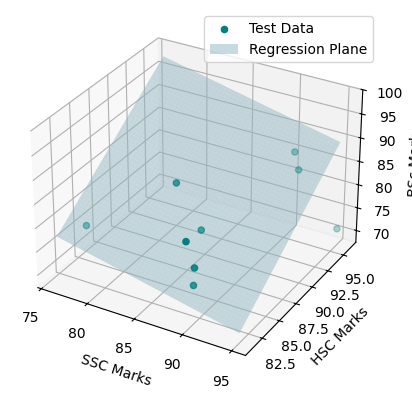

: 

In [ ]:
ssc_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
hsc_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
ssc_range, hsc_range = np.meshgrid(ssc_range, hsc_range)

y_range = model.weights[0] * ssc_range + model.weights[1] * hsc_range + model.bias

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='teal', label='Test Data')

ax.plot_surface(ssc_range, hsc_range, y_range, color='lightblue', alpha=0.5, label='Regression Plane')

ax.set_xlabel('SSC Marks')
ax.set_ylabel('HSC Marks')
ax.set_zlabel('BSc Marks')
ax.legend()

plt.show()